In [2]:
# 用AlexNet提取单个图像的5个卷积层前12个特征图
import os
import torch
from torchvision import transforms
from PIL import Image
from torchvision import models
# 加载AlexNet模型
alexnet = models.alexnet(pretrained=True)
# 加载原图片
img = Image.open("F:/math/mathorcup/2023mathorcup/data/data666/potholes5.jpg").convert('RGB')#这里是图片路径
print("图片原尺寸：", img.size)  
# 图像处理
transforms = transforms.Compose([
    transforms.Resize(224),
    # 转换成tensor，并且将图片归一化
    transforms.ToTensor()
])
# 将图片进行处理
img = transforms(img)
print("图片处理后的尺寸：", img.size())  
# 将单张图片转换成batch形式
img = torch.unsqueeze(img, dim=0)
print("图片处理后的尺寸：", img.size())  
# 测试前向传播是否正常
output = alexnet(img)
print("网络输出大小：", output.size())  

C:\Users\lenovo\anaconda3\envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\lenovo\anaconda3\envs\pytorch\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


图片原尺寸： (224, 224)
图片处理后的尺寸： torch.Size([3, 224, 224])
图片处理后的尺寸： torch.Size([1, 3, 224, 224])
网络输出大小： torch.Size([1, 1000])


In [3]:
# 设置需要获取哪些层的输出特征，对应的是AlexNet网络结构中层中的5个卷积层的名字
layers_name = ["0", "3", "6", "8", "10"]
def receive_feature_map(alexnet, x, layers_name):
    outputs = []
    for name, module in alexnet.features.named_children():
        x = module(x)
        if name in layers_name:
            outputs.append(x)
    return outputs

# 调用函数，得到每一层的特征图输出数据
outputs = receive_feature_map(alexnet, img, layers_name)

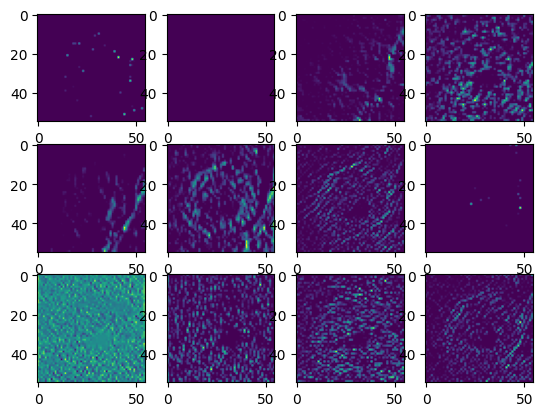

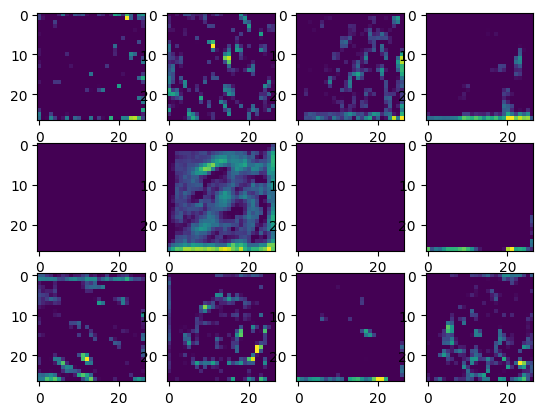

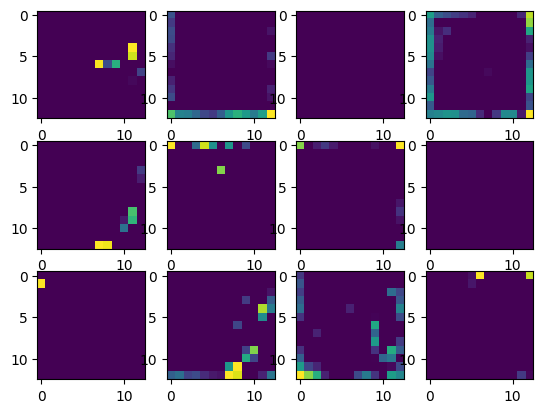

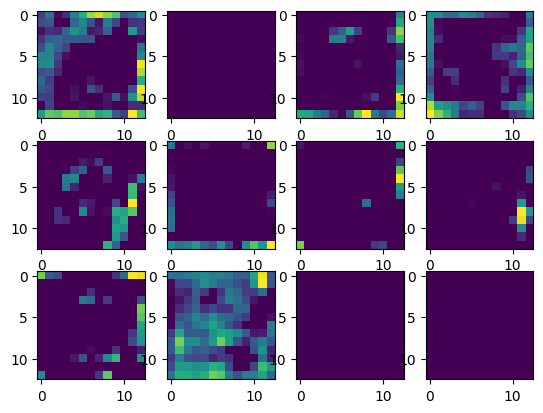

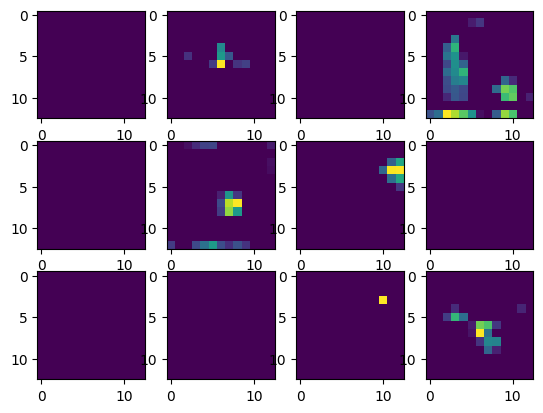

In [5]:
import matplotlib.pyplot as plt
j=0
# 绘制每一层卷积层输出的特征图
for index, feature_maps in enumerate(outputs):
    img = torch.squeeze(feature_maps)
    # 将tensor转换成numpy类型
    img = img.detach().numpy()
    # 获取特征图的通道数
    channel_num = img.shape[0]
    # 网络中每一层的特征，绘制前12张特征图
    num = channel_num if channel_num < 12 else 12
    fig = plt.figure()
    # 循环绘制
    for i in range(num):
        plt.subplot(3, 4, i + 1)
        plt.imshow(img[i, :, :])
    name_list=['conv1','conv2','conv3','conv4','conv5']
    figure_save_path = "F:/math/mathorcup/2023mathorcup/data/potholes5的5层卷积特征图"  
    plt.savefig(os.path.join(figure_save_path , name_list[j]))
    j=j+1
    plt.show(fig)